In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sns.set_style('whitegrid')
%matplotlib inline

In [4]:
fish_data = pd.read_csv('new_fish.csv')

In [5]:
fish_data.head()

,Species,Weight,LengthVer,LengthDiag,LengthCross,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


## Fish Market Data
[Link](https://www.kaggle.com/aungpyaeap/fish-market)


**Data Description**
1. Species : Species type of fish
2. Weight : Weight of a fish (in gram)
3. Lenght1 : Vertical Lenght (in cm)
4. Lenght2 : Diagonal Lenght (in cm)
5. Length3 : Cross Lenght (in cm)
6. Height : Height (in cm)
7. Width : Diagonal width (in cm)

In [6]:
fish_data['Species'].unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [7]:
fish_type = ['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt']

In [8]:
fish_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Species      156 non-null    object 
 1   Weight       156 non-null    float64
 2   LengthVer    156 non-null    float64
 3   LengthDiag   156 non-null    float64
 4   LengthCross  156 non-null    float64
 5   Height       156 non-null    float64
 6   Width        156 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.7+ KB


<AxesSubplot:>

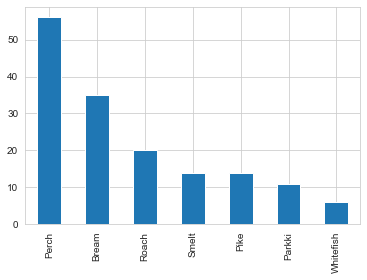

In [9]:
fish_data['Species'].value_counts().plot(kind='bar')

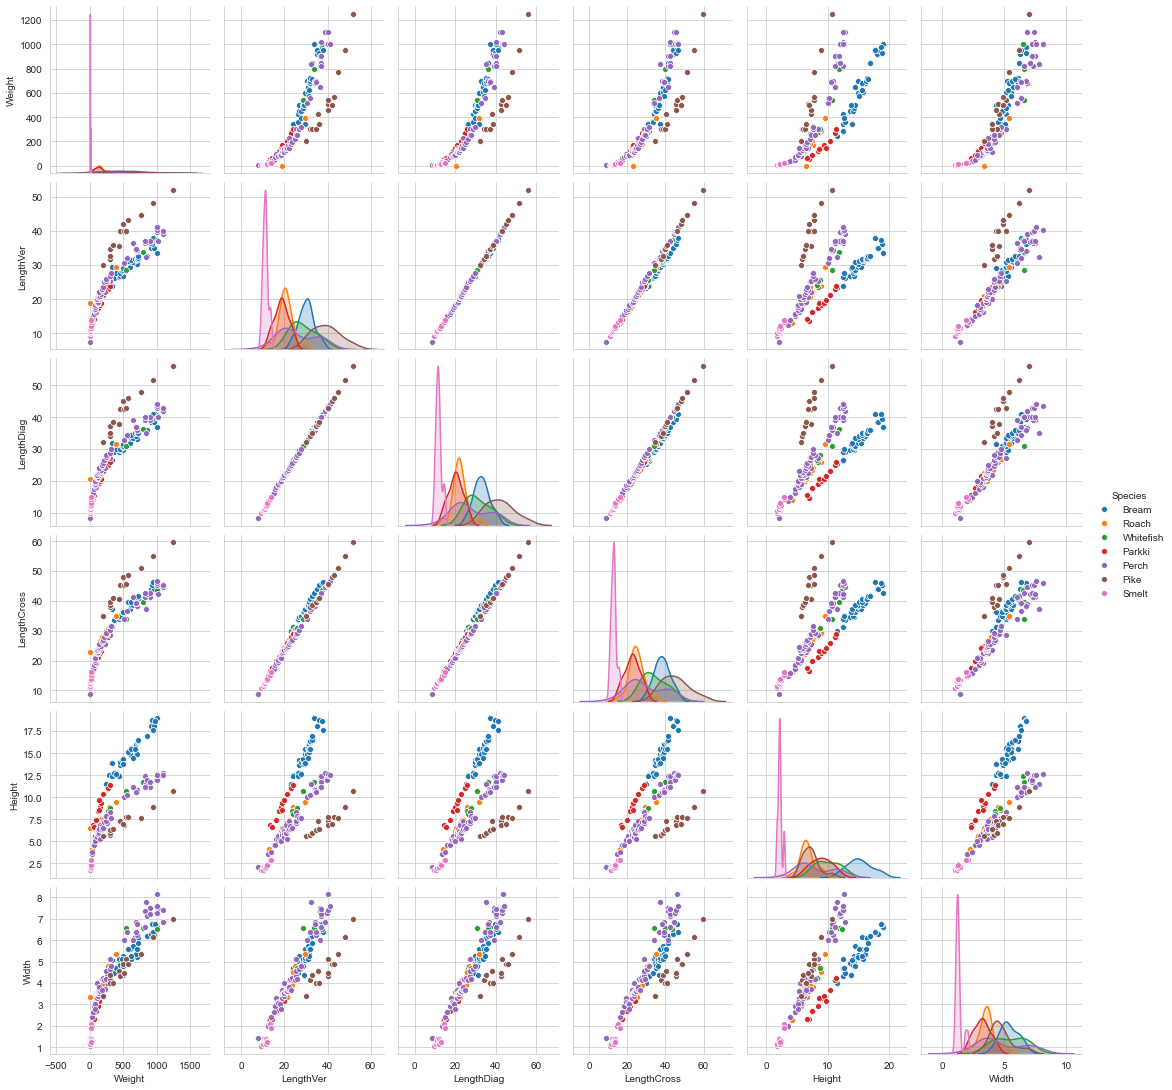

In [10]:
sns.pairplot(fish_data,kind='scatter',hue='Species')

<AxesSubplot:>

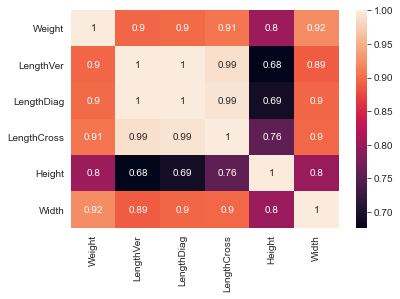

In [11]:
sns.heatmap(fish_data.corr(), annot=True)

## Data Preprocessing

In [12]:
one_hot = pd.get_dummies(fish_data['Species'])

In [13]:
fish_data = fish_data.drop('Species',axis=1)

In [14]:
fish_data = fish_data.join(one_hot)

In [15]:
fish_data.head()

,Weight,LengthVer,LengthDiag,LengthCross,Height,Width,Bream,Parkki,Perch,Pike,Roach,Smelt,Whitefish
0,242.0,23.2,25.4,30.0,11.5200,4.0200,1,0,0,0,0,0,0
1,290.0,24.0,26.3,31.2,12.4800,4.3056,1,0,0,0,0,0,0
2,340.0,23.9,26.5,31.1,12.3778,4.6961,1,0,0,0,0,0,0
3,363.0,26.3,29.0,33.5,12.7300,4.4555,1,0,0,0,0,0,0
4,430.0,26.5,29.0,34.0,12.4440,5.1340,1,0,0,0,0,0,0


In [16]:
X = fish_data.drop('Weight', axis=1)
y = fish_data['Weight']

In [17]:
X

,LengthVer,LengthDiag,LengthCross,Height,Width,Bream,Parkki,Perch,Pike,Roach,Smelt,Whitefish
0,23.2,25.4,30.0,11.5200,4.0200,1,0,0,0,0,0,0
1,24.0,26.3,31.2,12.4800,4.3056,1,0,0,0,0,0,0
2,23.9,26.5,31.1,12.3778,4.6961,1,0,0,0,0,0,0
3,26.3,29.0,33.5,12.7300,4.4555,1,0,0,0,0,0,0
4,26.5,29.0,34.0,12.4440,5.1340,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
151,11.5,12.2,13.4,2.0904,1.3936,0,0,0,0,0,1,0
152,11.7,12.4,13.5,2.4300,1.2690,0,0,0,0,0,1,0
153,12.1,13.0,13.8,2.2770,1.2558,0,0,0,0,0,1,0
154,13.2,14.3,15.2,2.8728,2.0672,0,0,0,0,0,1,0


In [18]:
y

0      242.0
1      290.0
2      340.0
3      363.0
4      430.0
       ...  
151     12.2
152     13.4
153     12.2
154     19.7
155     19.9
Name: Weight, Length: 156, dtype: float64

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.3,
                                                    random_state = 101)

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
lr = LinearRegression()

In [23]:
lr.fit(X_train,y_train)

LinearRegression()

In [24]:
print(lr.intercept_)

-573.6769618974747


In [25]:
lr.coef_

array([  19.81538153,    6.465475  ,  -13.30911355,   59.82177037,
         34.33561288, -213.18996465, -113.51633951,   31.97873269,
         27.70317369,  -20.68607268,  275.68279248,   12.02767798])

In [26]:
coeff = pd.DataFrame(lr.coef_,X.columns,columns=['Coefficient'])
coeff

,Coefficient
LengthVer,19.815382
LengthDiag,6.465475
LengthCross,-13.309114
Height,59.821770
Width,34.335613
Bream,-213.189965
Parkki,-113.516340
Perch,31.978733
Pike,27.703174
Roach,-20.686073


In [27]:
train_pred = lr.predict(X_train)

In [28]:
prediction = lr.predict(X_test)

<AxesSubplot:xlabel='Weight'>

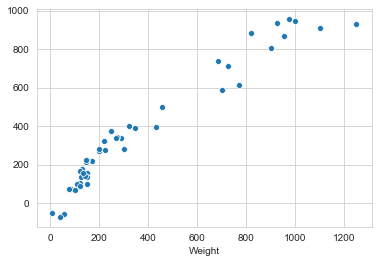

In [29]:
sns.scatterplot(y_test,prediction)

<AxesSubplot:xlabel='Weight'>

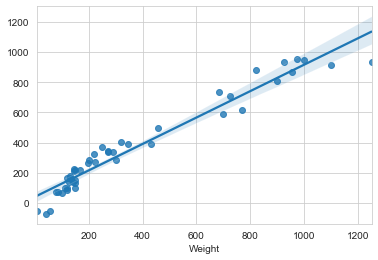

In [30]:
sns.regplot(x=y_test,y=prediction)

In [31]:
compdf = pd.DataFrame({'Actual':y_test,'Predict':prediction})

In [32]:
compdf[compdf['Predict'] < 0]

,Actual,Predict
61,55.0,-54.732166
142,6.7,-54.099810
74,40.0,-71.946995


In [33]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [34]:
print("MSE: ", mean_squared_error(y_test,prediction))
print("MAE ", mean_absolute_error(y_test,prediction))
print("RMSE: ", np.sqrt(mean_squared_error(y_test,prediction)))

MSE:  6898.691594585137
MAE  61.95293765253246
RMSE:  83.05836258068862
